# Logistic Regression Project


La **regresión logística** (*logistic regresion*) es una técnica de Machine Learning para encontrar las relaciones entre dos variables y predecir el valor de una de ellas en función de la otra. Normalmente, esta predicción tiene solo dos resultados posibles, como predecir el sexo de una persona (mujer, hombre) o el resultado de un experimento (éxito, fracaso).

Además, esta predicción se obtiene en términos de probabilidad; esto es, la probabilidad de que se dé un resultado determinado en un evento dicotómico. Luego, esta probabilidad se puede modificar para generar la predicción de una clase.



### Banking Marketing Campaign

**Business Insight**

Long-term deposits allow banks to hold money for a specific period of time, allowing the bank to use that money to enhance its investments. Marketing campaigns for this product are based on phone calls. If a user is not available at a given time, then they will be called back at another time.

**Description of the problem**

The Portuguese bank is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.

To address this problem we will create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit.

### Vamos a crear un modelo de machine learning para predecir si un cliente adquirirá o no un depósito a largo plazo.

In [ ]:
import pandas as pd

In [ ]:
# Example importing the CSV here

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', delimiter= ';')

dataframe.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Exploración y limpieza de los datos

In [ ]:
# Obtenemos las dimensiones del dataframe

dataframe.shape

(41188, 21)

In [ ]:
# Obtenemos la información sobre los tipos de datos y los valores nulos del dataframe

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Aquí se describen las variables, para una mejor comprensión de los datos:

- age. Age of customer (numeric)

- job. Type of job (categorical)

- marital. Marital status (categorical)

- education. Level of education (categorical)

- default. do you currently have credit (categorical)

- housing. do you have a housing loan (categorical)

- loan. Do you have a personal loan? (categorical)

- contact. Type of contact communication (categorical)

- month. Last month in which you have been contacted (categorical)

- day_of_week. Last day on which you have been contacted (categorical)

- duration. Duration of previous contact in seconds (numeric)

- campaign. Number of contacts made during this campaign to the customer (numeric)

- pdays. Number of days that elapsed since the last campaign until the customer was contacted (numeric)

- previous. Number of contacts made during the previous campaign to the customer (numeric)

- poutcome. Result of the previous marketing campaign (categorical).

- emp.var.rate. Employment variation rate. Quarterly indicator (numeric)

- cons.price.idx. Consumer price index. Monthly indicator (numeric)

- cons.conf.idx. Consumer confidence index. Monthly indicator (numeric)

- euribor3m. EURIBOR 3-month rate. Daily indicator (numeric)

- nr.employed. Number of employees. Quarterly indicator (numeric)

- y. TARGET. Whether the customer takes out a long-term deposit or not

Observamos que se trata de un dataframe sin datos nulos.
El dataframe tiene 21 columnas: 10 numéricas y 11 variables de tipo object (pueden ser categóricas o numéricas)

In [ ]:
# Vamos a ver si el dataset contiene duplicados

duplicate_rows = dataframe[dataframe.duplicated()]

duplicate_rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [ ]:
# Eliminamos los duplicados

dataframe = dataframe.drop_duplicates()

In [ ]:
# Volvemos a ver las dimensiones del dataframe
print(dataframe.shape)

(41176, 21)


In [ ]:
# Eliminamos las variables que consideramos innecesarias para la predicción que queremos realizar,
# que es si un cliente adquirirá o no un crédito a largo plazo.

dataframe.drop(['contact', 'month', 'day_of_week', 'duration', 'pdays', 'previous'], axis = 1, inplace = True)

<ipython-input-8-7b4acf927e0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.drop(['contact', 'month', 'day_of_week', 'duration', 'pdays', 'previous'], axis = 1, inplace = True)


In [ ]:
dataframe.head()

,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Pasamos al análisis univariante, donde analizaremos las variables que consideremos más importantes para
# la correcta creación de nuestro modelo de ML

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'darkgrid')
%matplotlib inline

Análisis univariante de variables categóricas

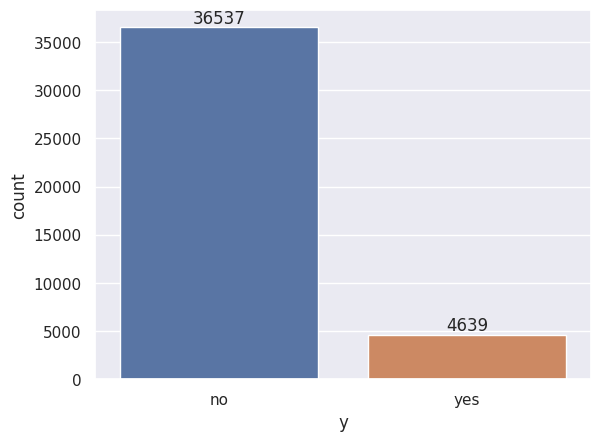

In [ ]:
# Vemos primero la variable objetivo, que nos muestra el número de clientes que han adquirido un depósito a largo plazo y las que no

target_plot = sns.countplot(data=dataframe, x='y')
target_plot.bar_label(target_plot.containers[0])
# Mostrar el gráfico
plt.show()


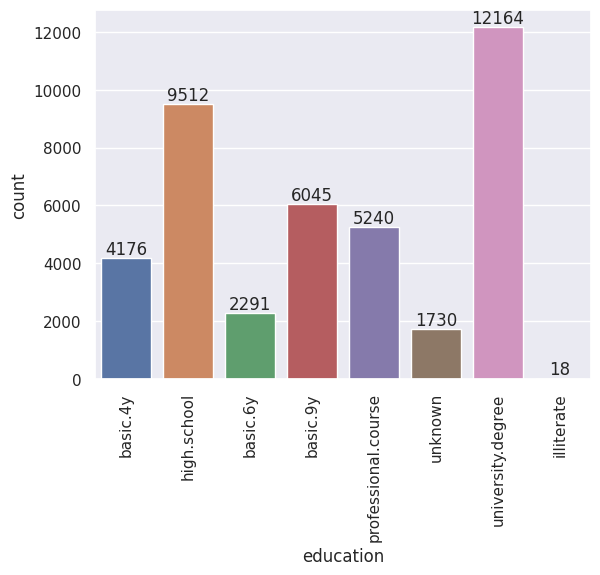

In [ ]:
# Observamos ahora la educación de los clientes contactados,
# ya que esta puede ser un indicador de el tipo de trabajo que el cliente tiene, su nivel de ingresos y de si puede neceistar un depósito a largo plazo

ed_plot = sns.countplot(data=dataframe, x='education')
ed_plot.bar_label(ed_plot.containers[0])
# Rotar los labels del eje x en 90 grados
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

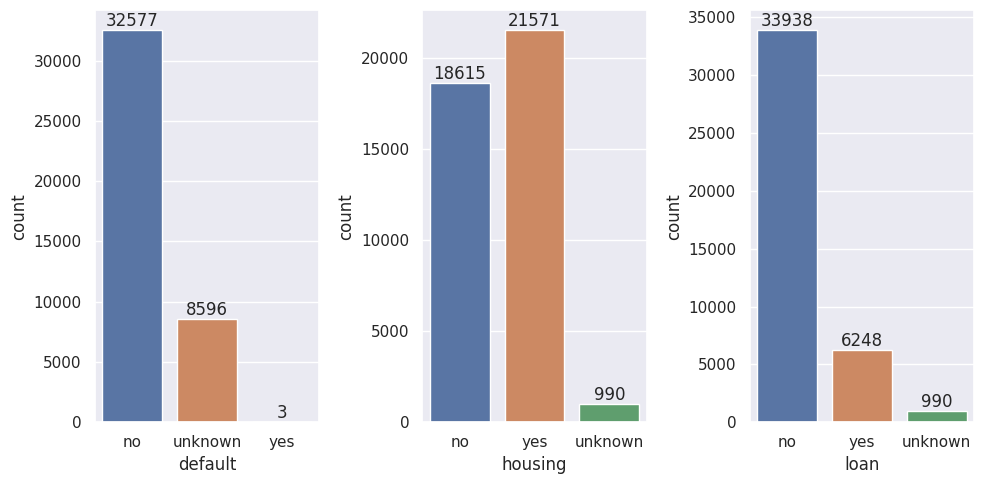

In [ ]:
# Vamos a crear un análisis múltiple sobre variables categóricas de importancia

fig, axis = plt.subplots(1, 3, figsize = (10, 5))

# Crear un histograma múltiple

default_plot = sns.countplot(ax = axis[0], data = dataframe, x = "default") # Do they currently have credit?
default_plot.bar_label(default_plot.containers[0])

housing_plot = sns.countplot(ax = axis[1], data = dataframe, x = "housing") # Do they currently have a housing loan?
housing_plot.bar_label(housing_plot.containers[0])

loan_plot = sns.countplot(ax = axis[2], data = dataframe, x = "loan") # Do they currently have a personal loan?
loan_plot.bar_label(loan_plot.containers[0])


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Observamos que los números en cuanto al número de clientes que tienen un crédito son claramente negativos. De igual manera, la mayoría de clientes no dispone de ningún préstamo personal. Mientras, más de la mitad de clientes contactados sí que cuentan con un préstamo para el hogar.

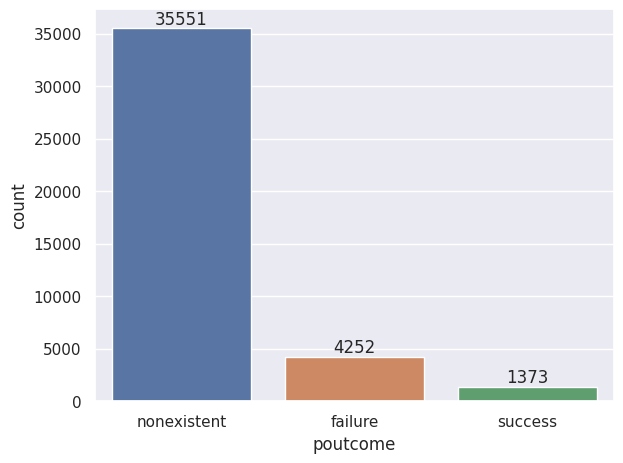

In [ ]:
# La última variable que vamos a ver es la que hace referencia al resultado de la campaña de marketing anterior

poutcome_plot = sns.countplot(data=dataframe, x='poutcome')
poutcome_plot.bar_label(poutcome_plot.containers[0])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Con esta variable los datos nos dicen que la gran mayoría de clientes no se les contacto. A los que sí se les contactó sobre el préstamo a largo plazo, más de la mitad lo rechazó.

Análisis univariante de variables numéricas


In [ ]:
print("En relación a la edad, podemos ver lo siguiente: ")
print("El promedio de edad de los clientes contactados es de:", round(dataframe['age'].mean()), "años")
print("La mediana de la edad es de:", round(dataframe['age'].median()), "años")
print("La edad mínima es de:", round(dataframe['age'].min()), "años")
print("La edad máxima es de:", round(dataframe['age'].max()), "años")
print("La desviación estandar de edad es de:", round(dataframe['age'].std()), "años")

En relación a la edad, podemos ver lo siguiente: 
El promedio de edad de los clientes contactados es de: 40 años
La mediana de la edad es de: 38 años
La edad mínima es de: 17 años
La edad máxima es de: 98 años
La desviación estandar de edad es de: 10 años


In [ ]:
print("En relación a la campaña de promoción de los depósitos a largo plazo, podemos ver lo siguiente: ")
print("El promedio de contactos que se hicieron es de:", round(dataframe['campaign'].mean()))
print("La mediana de los contactos que se hicieron es de:", round(dataframe['campaign'].median()))
print("El mínimo de contactos que se hicieron con un cliente fueron:", round(dataframe['campaign'].min()))
print("El máximo de contactos que se hicieron con un cliente fueron:", round(dataframe['campaign'].max()))
print("La desviación estandar de contactos es de:", round(dataframe['campaign'].std()))

En relación a la campaña de promoción de los depósitos a largo plazo, podemos ver lo siguiente: 
El promedio de contactos que se hicieron es de: 3
La mediana de los contactos que se hicieron es de: 2
El mínimo de contactos que se hicieron con un cliente fueron: 1
El máximo de contactos que se hicieron con un cliente fueron: 56
La desviación estandar de contactos es de: 3


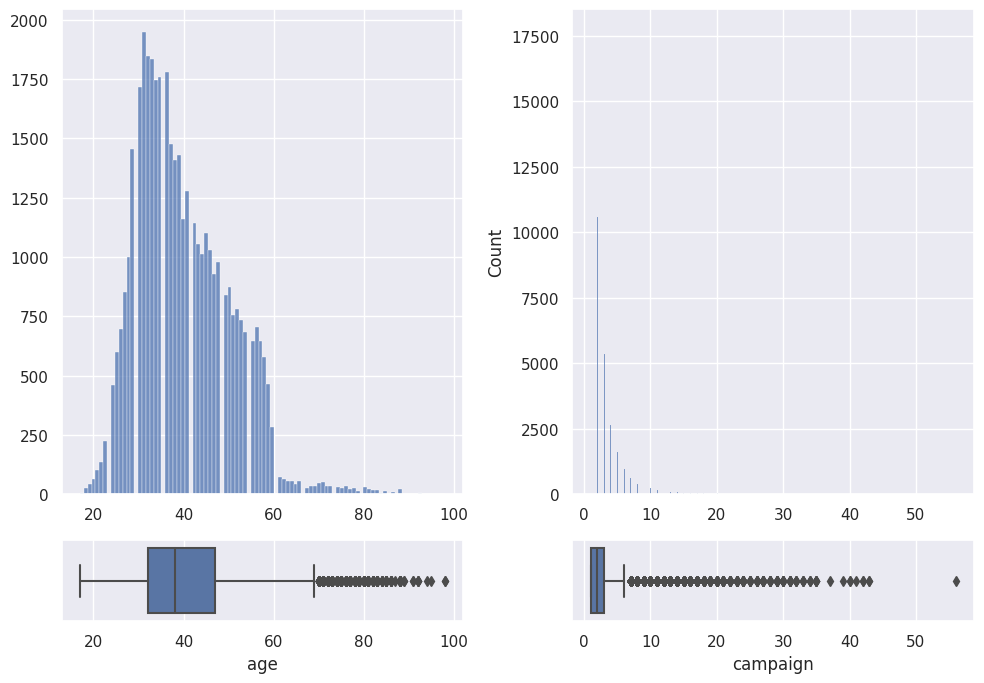

In [ ]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = dataframe, x = "age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 0], data = dataframe, x = "age")

sns.histplot(ax = axis[0, 1], data = dataframe, x = "campaign").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = dataframe, x = "campaign")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Análisis multivariante numérico-numérico

In [ ]:
# Vamos a modificar la convertir categórica y en numérica para poder trabajar mejor con ella

dataframe['y'] = dataframe['y'].replace({'yes': 1, 'no': 0})


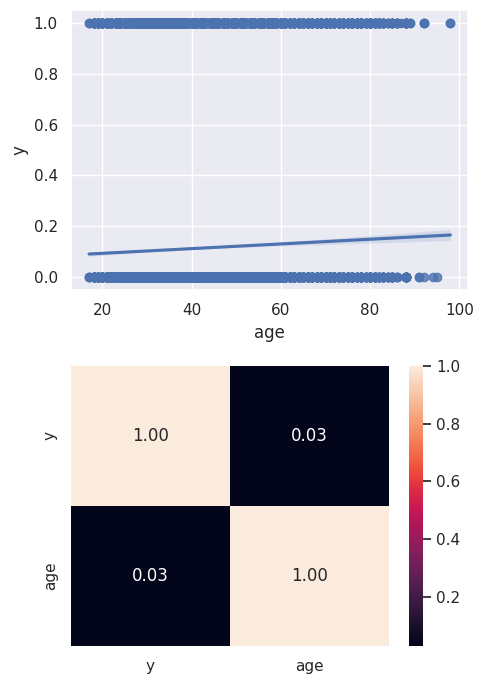

In [ ]:
fig, axis = plt.subplots(2,1, figsize = (5, 7))

sns.regplot(ax = axis[0], data = dataframe, x = 'age', y = 'y')
sns.heatmap(dataframe[["y", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Observamos que la edad y la decisión de adquirir el depósito a largo plazo  no tienen relación

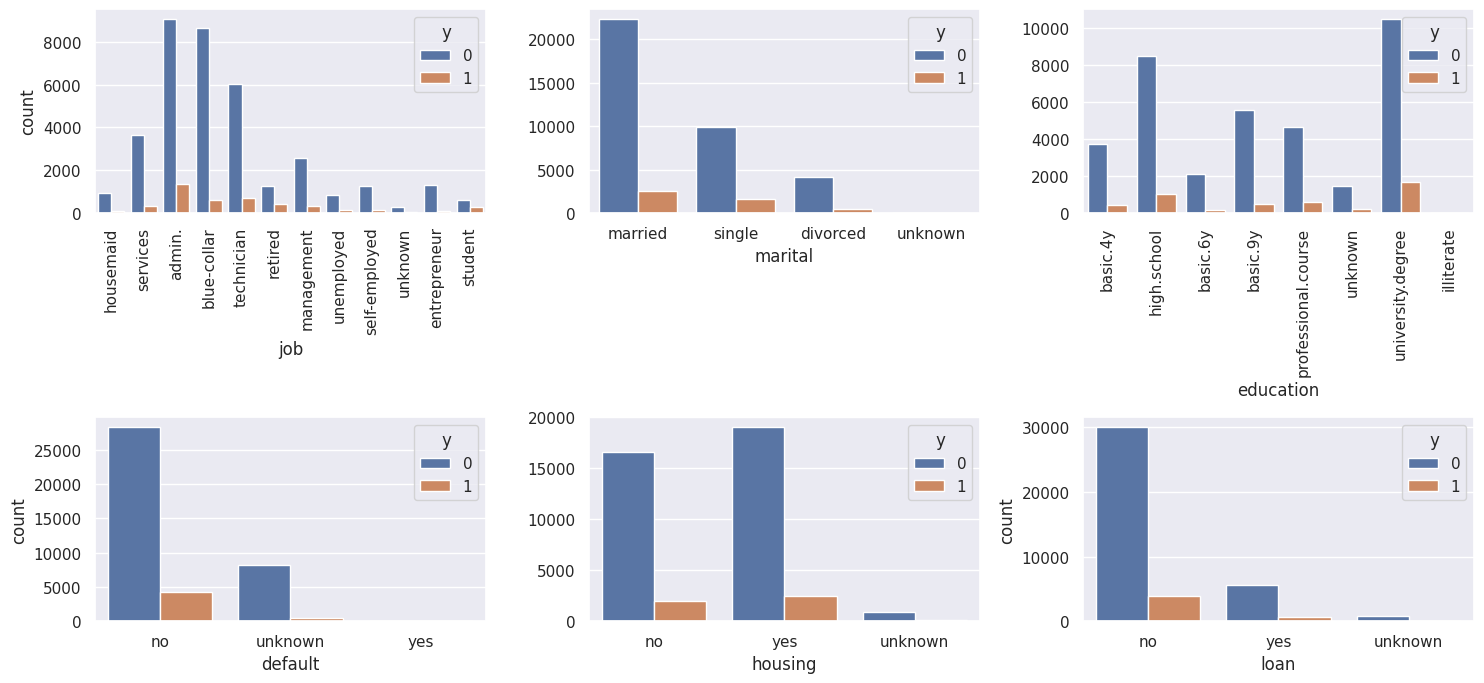

In [ ]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = dataframe, x = "job", hue = "y")
sns.countplot(ax = axis[0, 1], data = dataframe, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = dataframe, x = "education", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = dataframe, x = "default", hue = "y")
sns.countplot(ax = axis[1, 1], data = dataframe, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 2], data = dataframe, x = "loan", hue = "y")

# To rotate single subplots, not all
axis[0, 0].tick_params(axis="x", labelrotation=90)
axis[0, 2].tick_params(axis="x", labelrotation=90)

plt.tight_layout()


plt.show()

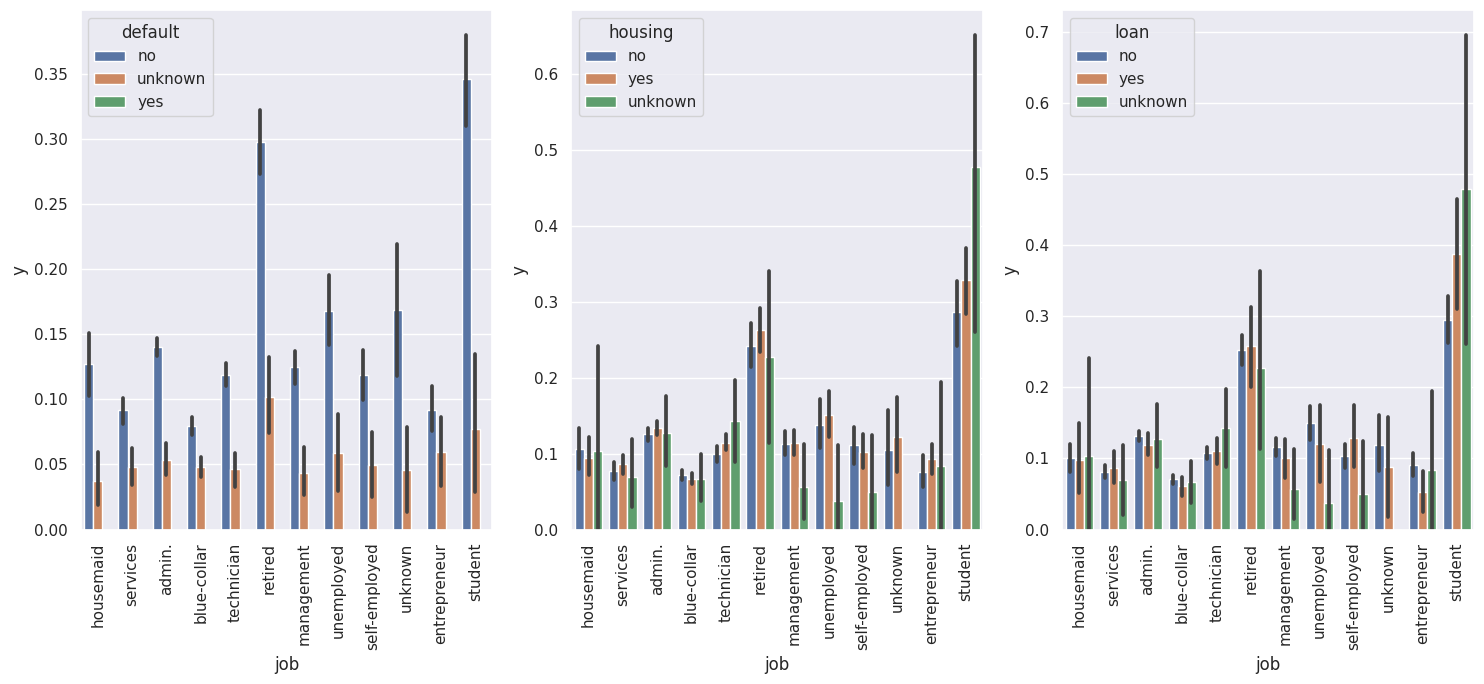

In [ ]:
fig, axis = plt.subplots(1, 3, figsize = (15, 7))

sns.barplot(ax = axis[0], data = dataframe, x = "job", y = "y", hue = "default")
sns.barplot(ax = axis[1], data = dataframe, x = "job", y = "y", hue = "housing")
sns.barplot(ax = axis[2], data = dataframe, x = "job", y = "y", hue = "loan")

axis[0].tick_params(axis="x", labelrotation=90)
axis[1].tick_params(axis="x", labelrotation=90)
axis[2].tick_params(axis="x", labelrotation=90)

plt.tight_layout()

plt.show()

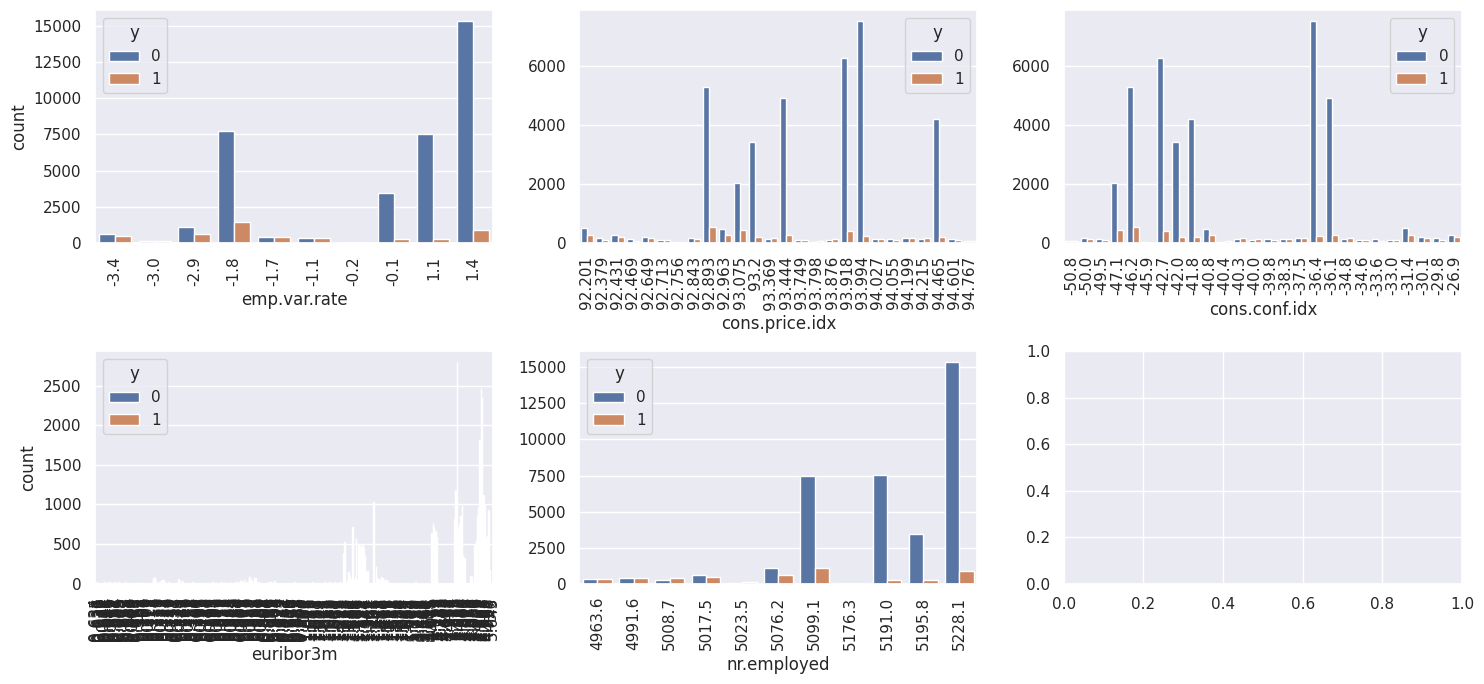

In [ ]:
fig, axis = plt.subplots(2, 3, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = dataframe, x = "emp.var.rate", hue = "y")
sns.countplot(ax = axis[0, 1], data = dataframe, x = "cons.price.idx", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[0, 2], data = dataframe, x = "cons.conf.idx", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = dataframe, x = "euribor3m", hue = "y")
sns.countplot(ax = axis[1, 1], data = dataframe, x = "nr.employed", hue = "y").set(ylabel = None)


# To rotate single subplots, not all
axis[0, 0].tick_params(axis="x", labelrotation=90)
axis[0, 1].tick_params(axis="x", labelrotation=90)
axis[0, 2].tick_params(axis="x", labelrotation=90)
axis[1, 0].tick_params(axis="x", labelrotation=90)
axis[1, 1].tick_params(axis="x", labelrotation=90)

plt.tight_layout()


plt.show()

In [ ]:
# pd.factorize --  This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values

dataframe['job'] = pd.factorize(dataframe['job'])[0]
dataframe['education'] = pd.factorize(dataframe['education'])[0]
dataframe['default'] = pd.factorize(dataframe['default'])[0]
dataframe['housing'] = pd.factorize(dataframe['housing'])[0]
dataframe['loan'] = pd.factorize(dataframe['loan'])[0]

What is a correlation heatmap?
A correlation heatmap is a visual graphic that shows how each variable in the dataset are correlated to one another. -1 signifies zero correlation, while 1 signifies a perfect correlation.

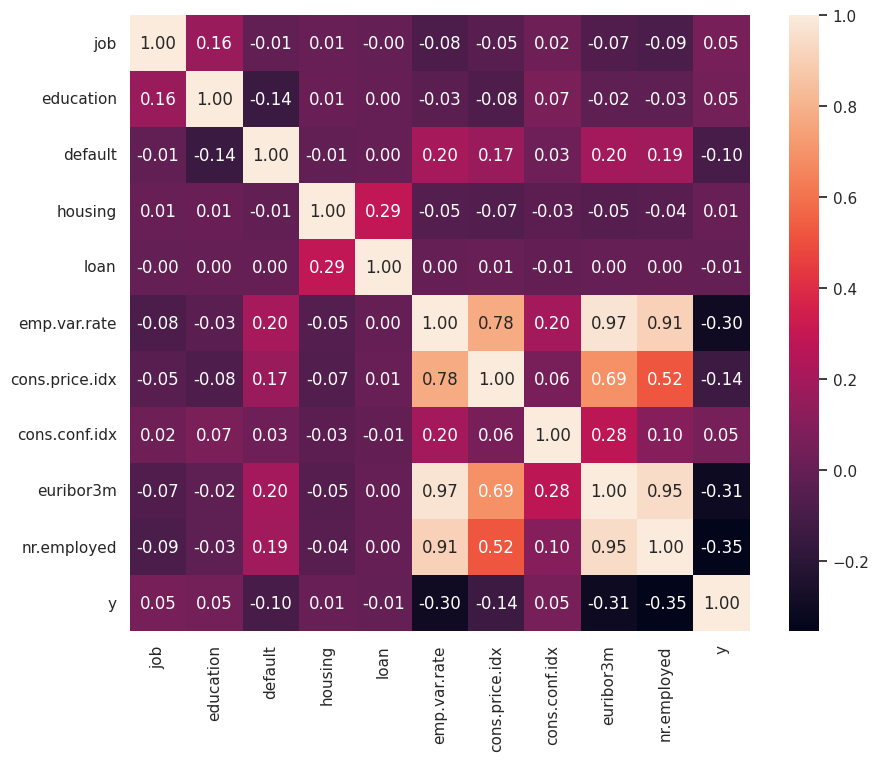

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(dataframe[['job', 'education','default','housing','loan','emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']].corr(), annot = True, fmt = '.2f')

plt.show()

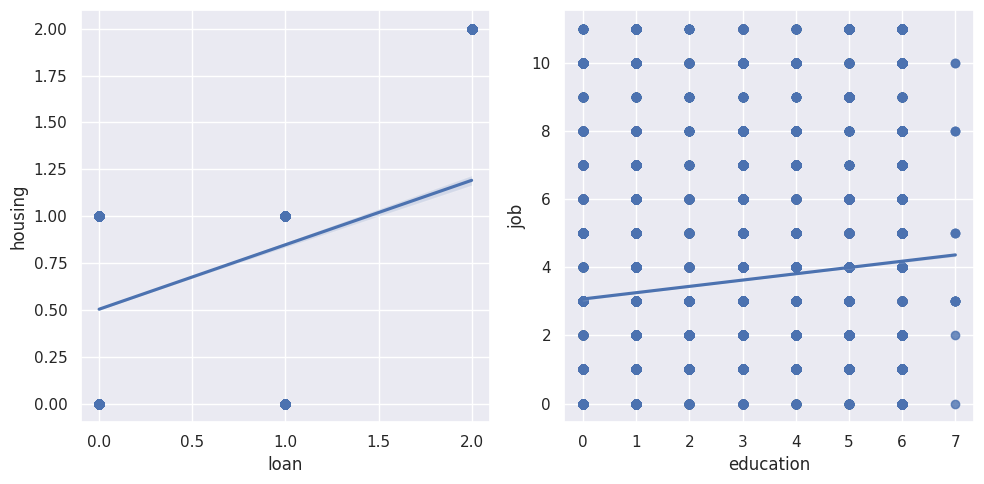

In [ ]:
fig, axis = plt.subplots(figsize = (10,5), ncols = 2)

sns.regplot(ax = axis [0], data = dataframe, x = 'loan', y = 'housing')
sns.regplot(ax = axis[1], data = dataframe, x = 'education', y = 'job')

plt.tight_layout()

plt.show()

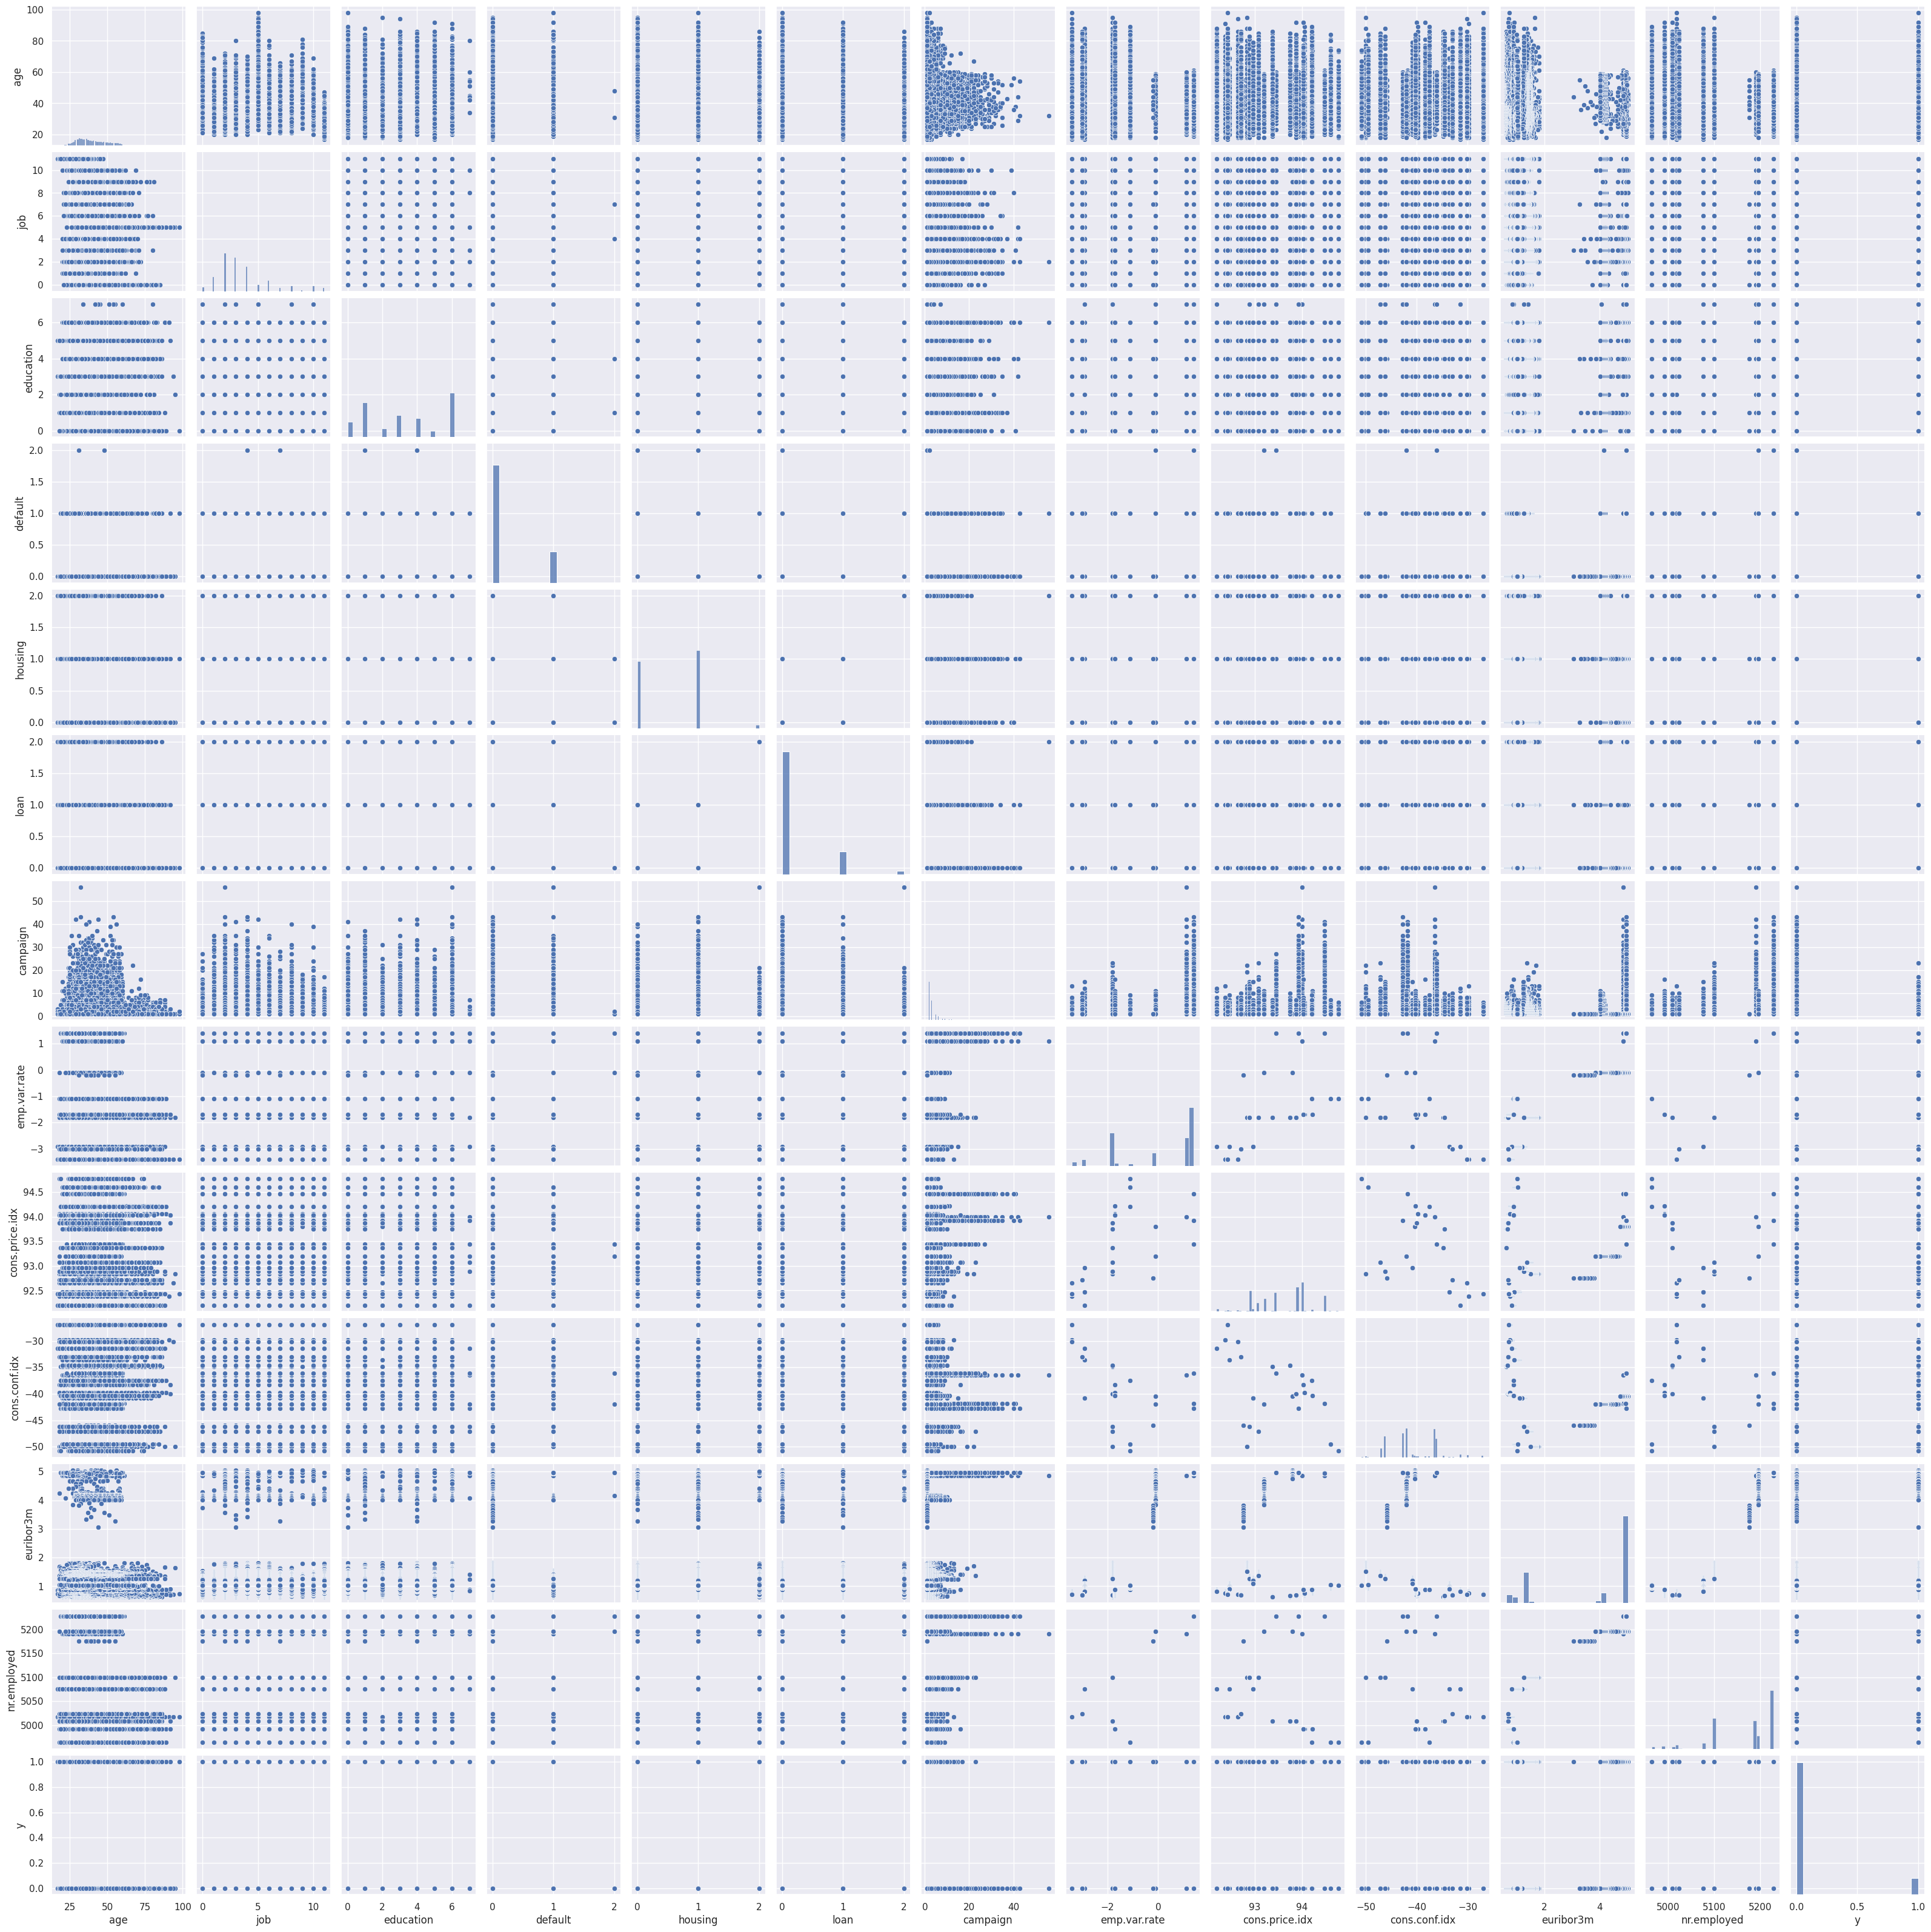

In [ ]:
sns.pairplot(data = dataframe)

### Ingerniería de características

In [ ]:
dataframe.describe()

,age,job,education,default,housing,loan,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,3.673863,3.277370,0.208908,0.571959,0.199825,2.567879,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,2.454340,2.185558,0.406713,0.541216,0.456055,2.770318,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,3.000000,3.000000,0.000000,1.000000,0.000000,2.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,4.000000,6.000000,0.000000,1.000000,0.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.000000,7.000000,2.000000,2.000000,2.000000,56.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


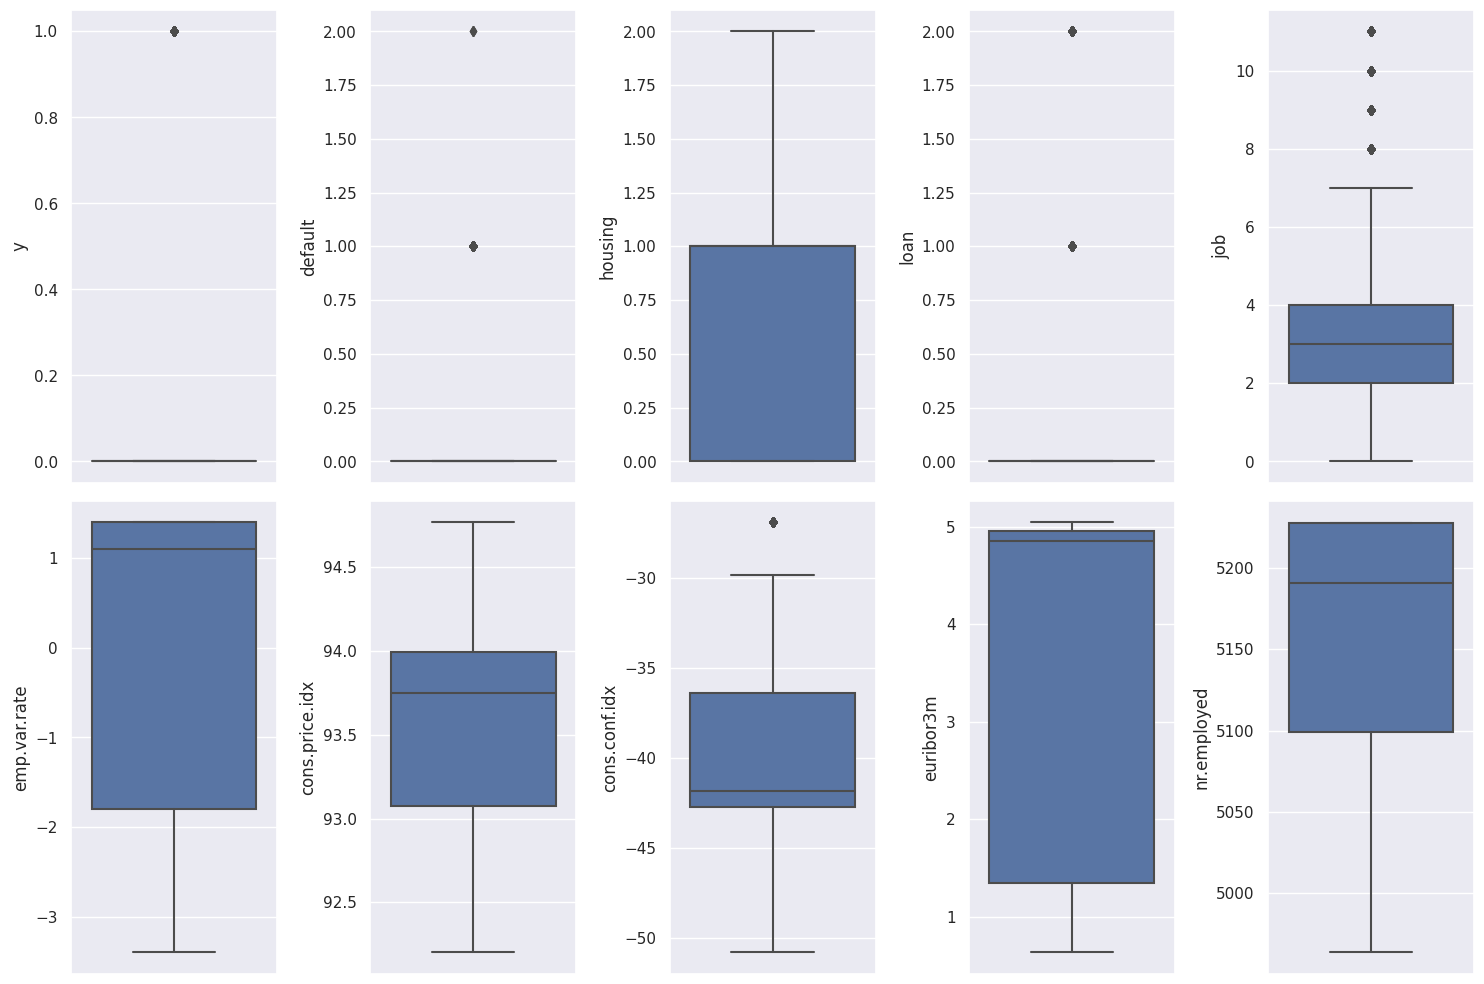

In [ ]:
fig, axis = plt.subplots(2, 5, figsize=(15, 10))

sns.boxplot(ax=axis[0, 0], data=dataframe, y="y")
sns.boxplot(ax=axis[0, 1], data=dataframe, y="default")
sns.boxplot(ax=axis[0, 2], data=dataframe, y="housing")
sns.boxplot(ax=axis[0, 3], data=dataframe, y="loan")
sns.boxplot(ax=axis[0, 4], data=dataframe, y="job")
sns.boxplot(ax=axis[1, 0], data=dataframe, y="emp.var.rate")
sns.boxplot(ax=axis[1, 1], data=dataframe, y="cons.price.idx")
sns.boxplot(ax=axis[1, 2], data=dataframe, y="cons.conf.idx")
sns.boxplot(ax=axis[1, 3], data=dataframe, y="euribor3m")
sns.boxplot(ax=axis[1, 4], data=dataframe, y="nr.employed")


plt.tight_layout()

plt.show()

Escalado de valores

In [ ]:
from sklearn.preprocessing import StandardScaler

num_variables = ['job', 'education','default','housing','loan','emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']
scaler = StandardScaler()
norm_features = scaler.fit_transform(dataframe[num_variables])
dataframe_norm = pd.DataFrame(norm_features, index = dataframe.index, columns = num_variables)
dataframe_norm.head()

,job,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-1.496903,-1.499576,-0.513657,-1.056816,-0.438165,0.648101,0.722628,0.886568,0.712463,0.331695,-0.356325
1,-1.089456,-1.042021,1.945111,-1.056816,-0.438165,0.648101,0.722628,0.886568,0.712463,0.331695,-0.356325
2,-1.089456,-1.042021,-0.513657,0.790896,-0.438165,0.648101,0.722628,0.886568,0.712463,0.331695,-0.356325
3,-0.682010,-0.584467,-0.513657,-1.056816,-0.438165,0.648101,0.722628,0.886568,0.712463,0.331695,-0.356325
4,-1.089456,-1.042021,-0.513657,-1.056816,1.754578,0.648101,0.722628,0.886568,0.712463,0.331695,-0.356325


Escalado min-max

In [ ]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ['job', 'education','default','housing','loan','emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(dataframe[num_variables])
dataframe_scal = pd.DataFrame(scal_features, index = dataframe.index, columns = num_variables)
dataframe_scal.head()

,job,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.000000,0.000000,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
1,0.090909,0.142857,0.5,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
2,0.090909,0.142857,0.0,0.5,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
3,0.181818,0.285714,0.0,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0.0
4,0.090909,0.142857,0.0,0.0,0.5,0.9375,0.698753,0.60251,0.957379,0.859735,0.0


Selección de características

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

# Dividimos el conjunto de datos en train y test

X = dataframe_scal.drop('y', axis = 1)
y = dataframe['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Con un valor de k = 5 queremos decir implicitamente que queremos eliminar 2 características del conjunto de datos

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,default,emp.var.rate,cons.price.idx,euribor3m,nr.employed
0,0.0,1.000000,0.669135,0.980503,1.000000
1,0.0,1.000000,0.882307,0.958966,1.000000
2,0.0,1.000000,0.484412,0.981410,1.000000
3,0.0,0.937500,0.698753,0.958059,0.859735
4,0.5,0.333333,0.269680,0.148946,0.512287


### Desarrollo del modelo de regresión logística

Inicialización y entrenamiento del modelo

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Predicción del modelo

In [ ]:
# Usamos el modelo entrenado para predecir el conjunto de datos de prueba

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Medimos la efectividad del modelo

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8813744536182613

El modelo arroja un 88% de precisión

Vamos a crear una matriz de confusión para ver mejor los resultados obtenidos por el modelo.

Cada fila de la matriz de confusión representa las instancias de una clase predicha, mientras que cada columna representa las instancias de una clase real.

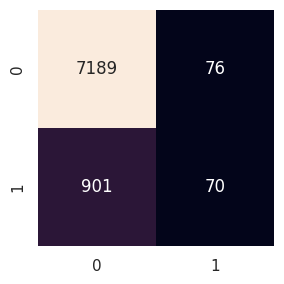

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

deposit_cm = confusion_matrix(y_test, y_pred)

# Dibujamos la matriz para hacerla más visual
cm_df = pd.DataFrame(deposit_cm)

plt.figure(figsize = (3,3))
sns.heatmap(cm_df, annot = True, fmt = 'd', cbar = False)

plt.tight_layout()

plt.show()

En la matriz de confusión, los resultados son los siguientes:

- Verdaderos Positivos (TP): **7189** casos en los que el modelo predijo positivo y la clase real también lo es

- Verdaderos Negativos (TN): **80** casos en los que el modelo predijo negativo y la clase real también lo es

- Falsos Positivos (FP):     **901** casos en los que el modelo predijo positivo y la clase real es negativa

- Falsos Negativos (FN):     **76** casos en los que el modelo predijo negativo y la clase real es positiva

### Optimización del modelo

La optimización del modelo se hace mediante la optimización de hiperparámetros, que es un mecanismo para aproximar una versón del modelo con alto rendimiento y efectividad.

Un hiperparámetro es una variable de configuración externa al modelo que se usa para entrenarlo. Estos hiperparámetros pueden ser:
- Tasa de aprendizaje del gradient descent
- Número de iteraciones en el gradient descent
- Número de capas en una red neuronal
- Número de neuronas por capa en una red neuronal
- Número de agrupaciones (k) en un modelo k-NN

Búsqueda de malla (grid search)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros a manos que queremos ajustar

hyperparams = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos el grid

grid = GridSearchCV(model, hyperparams, scoring= 'accuracy', cv = 5)

grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


Random search

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Definimos los parámetros que queremos ajustar
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [ ]:
random_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

Mejores hiperparámetros: {'solver': 'saga', 'penalty': 'l1', 'C': 0.004832930238571752}


La optimización por random search nos devuelve los siguientes parámetros optimizados:

- **solver**: saga
- **penalty**: l1
- **C**: 0.004832930238571752

Ahora, reentrenamos al modelo con estos nuevos parámetros.

In [ ]:
model_random_search = LogisticRegression(solver = 'saga', penalty = 'l1', C = 0.004832930238571752)
model_random_search.fit(X_train, y_train)
y_pred = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred)
random_search_accuracy

0.8821029626032054

La precisión del model antes era: 0.8813744536182613

Tras la optimización, la precisión del modelo es: 0.8821029626032054

Por lo que no hemos obtenido cambios substanciales, nos encontramos en un **máximo local**, por lo que debemos repetir la estrategia de optimización usando otros hiperparámetros para mejorar los resultados del modelo. Los que hemos usado (solver, penalty y C) no nos han servido para mejorar el modelo.
